# Hysteresis thresholding
### Dr. Tirthajyoti Sarkar, Fremont CA 94536

Hysteresis is the lagging of an effect—a kind of inertia. In the context of thresholding, it means that areas above some low threshold are considered to be above the threshold if they are also connected to areas above a higher, more stringent, threshold. They can thus be seen as continuations of these high-confidence areas.

Below, we compare normal thresholding to hysteresis thresholding. Notice how hysteresis allows one to ignore “noise” outside of the coin edges.

In [1]:
import matplotlib.pyplot as plt
from skimage import data, filters

### Load image and get the edges with `sobel`

In [2]:
image = data.coins()
edges = filters.sobel(image)

### Low, high, hysteresis threshold

In [3]:
low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

### Show

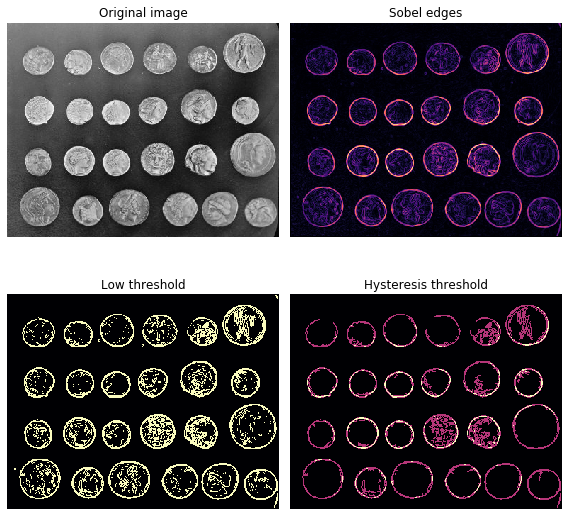

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(8,8))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()